<a href="https://colab.research.google.com/github/GrainSack/ML/blob/main/Simrank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
import itertools
from itertools import combinations_with_replacement

In [ ]:
data = pd.read_csv('/content/6df12f38',  skiprows = 71, delimiter=' ', header = None, on_bad_lines='skip', encoding = "utf-8")

In [ ]:
data = data.drop([366,367,368,369,370,371,372,373,374])

In [ ]:
print(data.shape)
data.head()

(366, 3)


,0,1,2
0,1,2,1
1,1,3,2
2,1,4,2
3,1,5,1
4,1,6,1


In [ ]:
G = nx.DiGraph()

for idx in range(len(data)):
  G.add_edge(data.iloc[idx][0], data.iloc[idx][1])

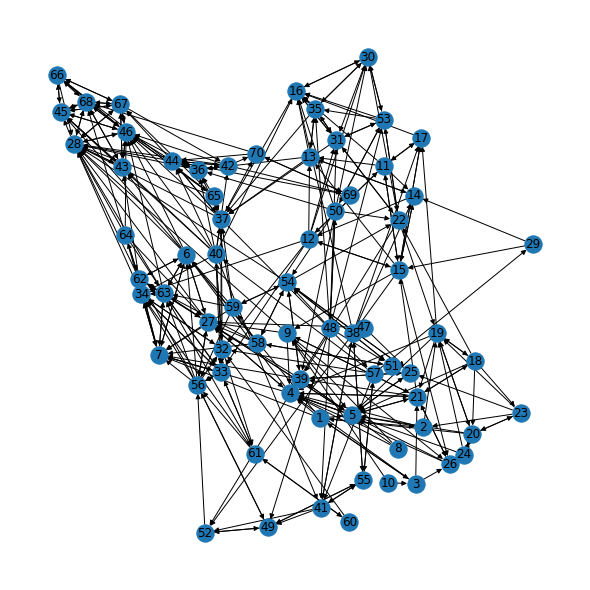

In [ ]:
plt.figure(figsize=(8, 8))

nx.draw(G, with_labels=True)
plt.show()

Pagerank

In [ ]:
#page rank for suq structure
# def _pagerank_python(
#     G,
#     teleport=0.85,
#     max_iter=1000,
#     eps=1.0e-6,
#     weight="weight",
#     block_size = None
# ):
#     if len(G) == 0:
#         return {}

#     # Create a copy in (right) stochastic form
#     W = nx.stochastic_graph(G, weight=weight)
#     N = W.number_of_nodes()

#     x = dict.fromkeys(W, 1.0 / N)
#     p = dict.fromkeys(W, 1.0 / N)
#     dangling_weights = p
#     dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]
#     #dead end

#     if block_size is None:
#     # power iteration: make up to max_iter iterations
#         for _ in range(max_iter):
#             xlast = x
#             x = dict.fromkeys(xlast.keys(), 0)
#             danglesum = teleport * sum(xlast[n] for n in dangling_nodes)
#             for n in x:
#                 # this matrix multiply looks odd because it is
#                 # doing a left multiply x^T=xlast^T*W
#                 for _, nbr, wt in W.edges(n, data=weight):
#                     x[nbr] += teleport * xlast[n] * wt
#                 x[n] += danglesum * dangling_weights.get(n, 0) + (1.0 - teleport) * p.get(n, 0)
#             # check convergence, l1 norm
#             err = sum(abs(x[n] - xlast[n]) for n in x)
#             if err < eps:
#                 return x
#             else:
#               continue

In [ ]:
def google_matrix(G):
  n = len(G)
  M = np.zeros((len(G),len(G)))
  nbr = []
  for i in range(len(G)):
    nbr_list = list(G.neighbors(str(i+1)))
    nbr.append(nbr_list)

  for idx in range(len(G)):
    nbr[idx]= list(map(int, nbr[idx]))
    nbr[idx] = np.array(nbr[idx])-1
    M[nbr[idx], idx] = 1/len(nbr[idx])
  return M

def page_rank(G, epsilon = 1.0e-10, block_size = None, max_iter = 10_000, transport = 0.8):
  A = google_matrix(G)
  n = len(G)
  r_new = np.zeros((n,1))
  r_old = (np.ones_like(np.zeros((n,1)), dtype=float, order='C'))* 1/n

  if block_size == None:
    for _ in range(max_iter):
      r_new = transport * np.dot(A,r_old) + (1 - transport) * (1/n)
      s = sum(r_new)
      r_new = r_new + (1-s)/n
      err = np.sum(abs(r_new - r_old))

      if err > epsilon:
        r_old = r_new

      else:
        out = {}
        for i in range(len(G)):
          out[str(i+1)] =  float(r_new[i])
        return out

  else:
    whole = int(len(G)/block_size)
    for _ in range(max_iter):
      for idx in range(whole):
        A_block = A[block_size*idx : block_size*(idx+1),:]
        r_new[block_size*idx : block_size*(idx+1)] = transport * np.dot(A_block,r_old) + (1 - transport) * (1/n)

      s = sum(r_new)
      r_new = r_new + (1-s)/n
      err = np.sum(abs(r_new - r_old))

      if err > epsilon:
        r_old = r_new

      else:
        out = {}
        for i in range(len(G)):
          out[str(i+1)] =  float(r_new[i])
        return out

In [ ]:
t = page_rank(G, epsilon = 0.0001, block_size = None, max_iter = 10_000, transport = 0.8)
t = {k: v for k, v in sorted(t.items(), key=lambda item: item[1], reverse = True )}
print(t)

{'28': 0.05791138006114837, '46': 0.05383080207638733, '67': 0.04450361032831956, '68': 0.04348297431636063, '45': 0.041492830612276856, '43': 0.04021048834675234, '66': 0.026935947344045537, '7': 0.025280202691298263, '5': 0.02520887946243318, '4': 0.022827600567156076, '27': 0.02274816403328057, '37': 0.022108297943856416, '44': 0.019844169264369816, '36': 0.019749531658594933, '6': 0.019439632807347312, '39': 0.018671363330838263, '33': 0.0183569675603992, '16': 0.018049343368931946, '34': 0.017633463609936763, '56': 0.016953653359712103, '42': 0.016274149448999513, '63': 0.01610668296250506, '21': 0.016076853021302157, '31': 0.01532127800778556, '35': 0.01484478072261772, '32': 0.013700474731870377, '62': 0.013485833200921716, '54': 0.013025767233633977, '25': 0.012963839528652056, '30': 0.012897801741310855, '15': 0.012429201102765465, '49': 0.011715247388709653, '70': 0.011177698146484397, '61': 0.010762623809660997, '13': 0.010628047474927918, '53': 0.010135850493689522, '55': 0

Block based Page Rank

In [ ]:
p1 = page_rank(G, epsilon = 0.0001, block_size = 10, max_iter = 10_000, transport = 0.8)
p1 = {k: v for k, v in sorted(p1.items(), key=lambda item: item[1], reverse = True )}
print(p1)

{'28': 0.0576504151835268, '46': 0.05345128471442069, '67': 0.044190882897811076, '68': 0.04318816638807514, '45': 0.04114587264771467, '43': 0.039923475798830495, '66': 0.02671338400077082, '7': 0.025444935901194263, '5': 0.02531562129721402, '4': 0.022920628774583254, '27': 0.022844647900205503, '37': 0.022205225496663577, '44': 0.01981724054258245, '36': 0.01969116074792511, '6': 0.01956225412348024, '39': 0.018728437029094575, '33': 0.018473628139222747, '16': 0.018150909341760803, '34': 0.01774329813773768, '56': 0.01701186947545992, '42': 0.016196366721024303, '63': 0.016180910005088353, '21': 0.016122149840223535, '31': 0.015385520053746278, '35': 0.014909440435167872, '32': 0.013780969329917, '62': 0.01354286143849016, '54': 0.013056318675311668, '25': 0.013002840795951588, '30': 0.012955679737626184, '15': 0.012484112053419767, '49': 0.011746469290695054, '70': 0.011173576185740412, '61': 0.010806964412991355, '13': 0.010685315482257757, '53': 0.01016389036567809, '55': 0.0098

SimRank

In [ ]:
G1 = nx.DiGraph()
a = [[1,2],[2,1],[3,2],[3,4],[4,5],[5,3]]
for idx in range(len(a)):
  G1.add_edge(a[idx][0], a[idx][1])

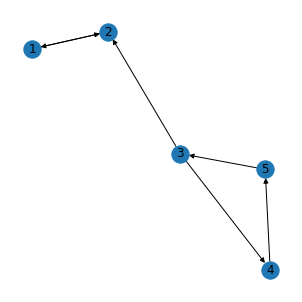

In [ ]:
plt.figure(figsize=(4, 4))

nx.draw(G1, with_labels=True)
plt.show()

In [ ]:
def _simrank_similarity_numpy(
    G,
    source=None,
    target=None,
    importance_factor=0.9,
    max_iterations=1000,
    tolerance=1e-4,
):

    adjacency_matrix = nx.to_numpy_array(G)

    # column-normalize the ``adjacency_matrix``
    s = np.array(adjacency_matrix.sum(axis=0))
    s[s == 0] = 1
    adjacency_matrix /= s  # adjacency_matrix.sum(axis=0)

    newsim = np.eye(len(G), dtype=np.float64)
    for its in range(max_iterations):
        prevsim = newsim.copy()
        newsim = importance_factor * ((adjacency_matrix.T @ prevsim) @ adjacency_matrix)
        np.fill_diagonal(newsim, 1.0)

        if np.allclose(prevsim, newsim, atol=tolerance):
            break

    if its + 1 == max_iterations:
        raise nx.ExceededMaxIterations(
            f"simrank did not converge after {max_iterations} iterations."
        )

    if source is not None and target is not None:
        return newsim[source, target]
    if source is not None:
        return newsim[source]
    return newsim

In [ ]:
def simrank(
    G,
    source=None,
    target=None,
    importance_factor=0.9,
    max_iterations=1000,
    tolerance=1e-4,
):

    nodelist = list(G)
    s_indx = None if source is None else nodelist.index(source)
    t_indx = None if target is None else nodelist.index(target)

    x = _simrank_similarity_numpy(
        G, s_indx, t_indx, importance_factor, max_iterations, tolerance
    )

    if isinstance(x, np.ndarray):
        if x.ndim == 1:
            return {node: val for node, val in zip(G, x)}
        else:  # x.ndim == 2:
            return {u: dict(zip(G, row)) for u, row in zip(G, x)}
    return x

In [ ]:
sim = simrank(G1, source=None, target=None, importance_factor=0.8, max_iterations=1000, tolerance=0.0001)
sim

{1: {1: 1.0,
  2: 0.08820444022964226,
  3: 0.03384174182400001,
  4: 0.10586539436277763,
  5: 0.33082935738368},
 2: {1: 0.08820444022964226,
  2: 1.0,
  3: 0.13233174295347203,
  4: 0.41353669672960003,
  5: 0.04234615774511105},
 3: {1: 0.03384174182400001, 2: 0.13233174295347203, 3: 1.0, 4: 0.0, 5: 0.0},
 4: {1: 0.10586539436277763, 2: 0.41353669672960003, 3: 0.0, 4: 1.0, 5: 0.0},
 5: {1: 0.33082935738368, 2: 0.04234615774511105, 3: 0.0, 4: 0.0, 5: 1.0}}

Simrank bipartite graph

In [ ]:
from networkx.algorithms import bipartite
B = nx.Graph()
# Add nodes with the node attribute "bipartite"|
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (2, "a"), (3, "a"), (2, "b"), (3, "b"), (4, "b")])

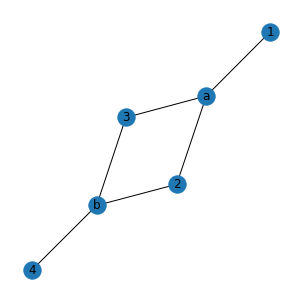

In [ ]:
plt.figure(figsize=(4, 4))

nx.draw(B, with_labels=True)
plt.show()

In [ ]:
sim2 = simrank(B, source=None, target=None, importance_factor=0.8, max_iterations=1000, tolerance=0.0001)
sim2

{1: {1: 1.0,
  2: 0.6186006022396926,
  3: 0.6186006022396926,
  4: 0.4372012044793853,
  'a': 0.0,
  'b': 0.0},
 2: {1: 0.6186006022396926,
  2: 1.0,
  3: 0.6186006022396926,
  4: 0.6186006022396926,
  'a': 0.0,
  'b': 0.0},
 3: {1: 0.6186006022396926,
  2: 0.6186006022396926,
  3: 1.0,
  4: 0.6186006022396926,
  'a': 0.0,
  'b': 0.0},
 4: {1: 0.4372012044793853,
  2: 0.6186006022396926,
  3: 0.6186006022396926,
  4: 1.0,
  'a': 0.0,
  'b': 0.0},
 'a': {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 'a': 1.0, 'b': 0.5465282886265522},
 'b': {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 'a': 0.5465282886265522, 'b': 1.0}}

In [ ]:
def sim_rank_bipartite(G, max_iter = 10_000, c = 0.8):
  item, user = bipartite.sets(B)
  item_sim = itertools.combinations_with_replacement(item, 2)
  user_sim = itertools.combinations_with_replacement(user, 2)

  R_0_item = {}
  R_0_user = {}
  for (x,y) in item_sim:
    if x==y:
      R_0_item['{}'.format((x,y))] = 1
    else:
      R_0_item['{}'.format((x,y))]= 0

  for (x,y) in user_sim:
    if x==y:
      R_0_user['{}'.format((x,y))] = 1
    else:
      R_0_user['{}'.format((x,y))]= 0

  for value, key in zip(R_0_user.keys() , R_0_user.values()) :
     R_0_item[str(value)] = key

  R_0 = R_0_item
  R_k_user = 0
  R_k_item = 0

  for k in range(max_iter):
     for key, value in zip(R_0.keys() , R_0.values()) :
      if value == 1:
        pass
      else:
        ne_1 = list(G.neighbors(key[2]))
        ne_2 = list(G.neighbors(key[7]))
        const = c/(len(ne_1) * len(ne_2))
        for i in ne_1:
          for j in ne_2:
            if '(i,j)' in R_0:
              


SyntaxError: ignored

In [ ]:
  item, user = bipartite.sets(B)
  item_sim = itertools.combinations_with_replacement(item, 2)
  user_sim = itertools.combinations_with_replacement(user, 2)
 
 
  R_0_item = {}
  R_0_user = {}
  for (x,y) in item_sim:
    if x==y:
      R_0_item['{}'.format((x,y))] = 1
    else:
      R_0_item['{}'.format((x,y))]= 0

  for (x,y) in user_sim:
    if x==y:
      R_0_user['{}'.format((x,y))] = 1
    else:
      R_0_user['{}'.format((x,y))]= 0   

  for value, key in zip(R_0_user.keys() , R_0_user.values()) :
    R_0_item[str(value)] = key

  R_0 = R_0_item  

In [ ]:
user

{'a', 'b'}

In [ ]:

ne_1 = list(G.neighbors(key[2]))
ne_2 = list(G.neighbors(key[7]))
const = c/(len(ne_1) * len(ne_2))
for i in ne_1:
  for j in ne_2:
    if '(i,j)' in R_0:

In [ ]:
R_0

{'(1, 1)': 1,
 '(1, 2)': 0,
 '(1, 3)': 0,
 '(1, 4)': 0,
 '(2, 2)': 1,
 '(2, 3)': 0,
 '(2, 4)': 0,
 '(3, 3)': 1,
 '(3, 4)': 0,
 '(4, 4)': 1,
 "('b', 'b')": 1,
 "('b', 'a')": 0,
 "('a', 'a')": 1}

In [ ]:
B.neighbors(1)

In [ ]:
for key, value in zip(R_0.keys() , R_0.values()) :
    print(type(key[4]))
    # ne_1 = list(B.neighbors(key[1]))
    # ne_2 = list(B.neighbors(key[4]))
    # print(ne_1, ne_2)
    # const = 0.8/(len(ne_1) * len(ne_2))
    # print(key)
    #print(R_0['{}'.format(key)])

In [ ]:
def item_sim(G2,x_1,x_2,k,c,R_k_1):
  A_1 = list(nx.all_neighbors(G2,x_1))
  A_2 = list(nx.all_neighbors(G2,x_2))
  const = c/(len(A_1)*len(A_2))
   
  return R_k
def user_sim(G2,k,c):
  pass

[[1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
sim2 = simrank(B, source=None, target=None, importance_factor=0.8, max_iterations=1000, tolerance=0.0001)
sim2

{1: {1: 1.0,
  2: 0.6186006022396926,
  3: 0.6186006022396926,
  4: 0.4372012044793853,
  'a': 0.0,
  'b': 0.0},
 2: {1: 0.6186006022396926,
  2: 1.0,
  3: 0.6186006022396926,
  4: 0.6186006022396926,
  'a': 0.0,
  'b': 0.0},
 3: {1: 0.6186006022396926,
  2: 0.6186006022396926,
  3: 1.0,
  4: 0.6186006022396926,
  'a': 0.0,
  'b': 0.0},
 4: {1: 0.4372012044793853,
  2: 0.6186006022396926,
  3: 0.6186006022396926,
  4: 1.0,
  'a': 0.0,
  'b': 0.0},
 'a': {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 'a': 1.0, 'b': 0.5465282886265522},
 'b': {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 'a': 0.5465282886265522, 'b': 1.0}}

In [ ]:
permute = itertools.permutations(G2.nodes(),2)
A = nx.all_neighbors(G2,1)
#print(list(permute))
print(len(list(A)))

1


In [ ]:
A = nx.all_neighbors(G2,1)

[e for e in G2.edges]

[('a', 1), ('a', 2), ('a', 3), ('b', 2), ('b', 3), ('b', 4)]

In [ ]:
sim = simrank(G2, source=None, target=None, importance_factor=0.8, max_iterations=1000, tolerance=0.0001)
sim

{'a': {'a': 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 'b': 0.0, 4: 0.0},
 1: {'a': 0.0, 1: 1.0, 2: 0.4, 3: 0.4, 'b': 0.0, 4: 0.0},
 2: {'a': 0.0, 1: 0.4, 2: 1.0, 3: 0.4, 'b': 0.0, 4: 0.4},
 3: {'a': 0.0, 1: 0.4, 2: 0.4, 3: 1.0, 'b': 0.0, 4: 0.4},
 'b': {'a': 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 'b': 1.0, 4: 0.0},
 4: {'a': 0.0, 1: 0.0, 2: 0.4, 3: 0.4, 'b': 0.0, 4: 1.0}}

page rank for Networkx module

In [ ]:
p = nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
p = {k: v for k, v in sorted(p.items(), key=lambda item: item[1], reverse = True )}
print(p)

{'28': 0.06615657232760773, '46': 0.0639948617449111, '67': 0.05419603742429261, '68': 0.05267308304841811, '45': 0.05030967290436415, '43': 0.047969830001272966, '66': 0.0328747636699123, '7': 0.024080294863631918, '5': 0.022864564750231225, '37': 0.021384775217623195, '27': 0.021198325128761256, '36': 0.021148562103638194, '44': 0.02056228524276596, '4': 0.020532565651550923, '6': 0.018338392817737262, '42': 0.018016726534196992, '33': 0.017493680525841597, '39': 0.017174141243988538, '34': 0.01676739155739859, '16': 0.016492571479683072, '56': 0.01565326264883118, '63': 0.01523953392080998, '21': 0.014370828903714012, '31': 0.014081759762404927, '35': 0.013655672179006963, '62': 0.012717155518422217, '32': 0.012653636154910679, '30': 0.011737847377165957, '25': 0.011586820766468334, '54': 0.011547161298032354, '70': 0.0110507581945316, '15': 0.01081358455204963, '49': 0.010391492689279455, '61': 0.009837234949968111, '65': 0.009452491189555585, '13': 0.00937912163231807, '53': 0.009